# Algoritmo Kmeans

In [1]:
# Importando as libs que serão usadas
import pandas as pd
import numpy as np

In [2]:
# Importando as funções que serão usadas no código

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from kneed import DataGenerator, KneeLocator
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler 

In [4]:
# Importando a base de dados

df = pd.read_csv('Iris.csv', sep=',')
df.head(5)

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
entries = df.iloc[:, 0:4].values
entries.shape

(150, 4)

In [7]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
entries = scaler.fit_transform(entries)
entries

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [9]:
# Determinando a Silhouette para número máximo de cluster estimado (Raiz(instâncias/2)

limit = int((entries.shape[0]//2)**0.5)
for k in range(2, limit+1):
    model = KMeans(n_clusters=k)
    model.fit(entries)
    pred = model.predict(entries)
    score = silhouette_score(entries, pred)
    print('Silhouette Score k = {}: {:<.3f}'.format(k, score))

Silhouette Score k = 2: 0.629
Silhouette Score k = 3: 0.504
Silhouette Score k = 4: 0.445
Silhouette Score k = 5: 0.352
Silhouette Score k = 6: 0.347
Silhouette Score k = 7: 0.342
Silhouette Score k = 8: 0.332


/home/gabriel/Documentos/PUC-Minas_Backup/Ciência da Computação/Graduating/4°Período/IA/Lista6/python/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gabriel/Documentos/PUC-Minas_Backup/Ciência da Computação/Graduating/4°Período/IA/Lista6/python/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gabriel/Documentos/PUC-Minas_Backup/Ciência da Computação/Graduating/4°Período/IA/Lista6/python/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the v

In [13]:
wcss = []
for i in range(2, 11):
  #print(i)
  kmeans = KMeans(n_clusters=i, random_state=10)
  kmeans.fit(entries)
  wcss.append(kmeans.inertia_)

wcss

/home/gabriel/Documentos/PUC-Minas_Backup/Ciência da Computação/Graduating/4°Período/IA/Lista6/python/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gabriel/Documentos/PUC-Minas_Backup/Ciência da Computação/Graduating/4°Período/IA/Lista6/python/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gabriel/Documentos/PUC-Minas_Backup/Ciência da Computação/Graduating/4°Período/IA/Lista6/python/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the v

[12.14368828157972,
 6.998114004826761,
 5.532831003081897,
 4.580066071039319,
 3.9297268423415015,
 3.4750340333223813,
 3.129589848164076,
 2.810253627005429,
 2.5315649974148102]

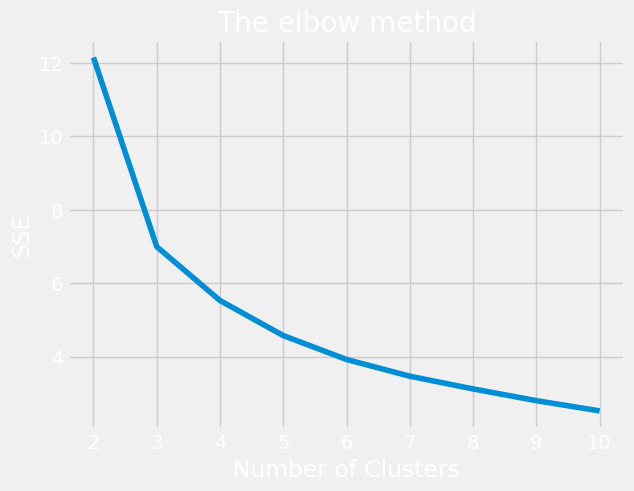

In [15]:
# Analisando o ponto de inflexão da curva

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), wcss)
plt.xticks(range(2, 11))
plt.title('The elbow method')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [16]:
kl = KneeLocator(range(2, 11), wcss, curve="convex", direction="decreasing")
kl.elbow

4

In [18]:
#K-means++ é um método de otimização de centroide para ajudar o modelo a convergir mais rapidamente

kmeans = KMeans(n_clusters=3, random_state=0)

#kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

saida_kmeans = kmeans.fit_predict(entries)

/home/gabriel/Documentos/PUC-Minas_Backup/Ciência da Computação/Graduating/4°Período/IA/Lista6/python/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


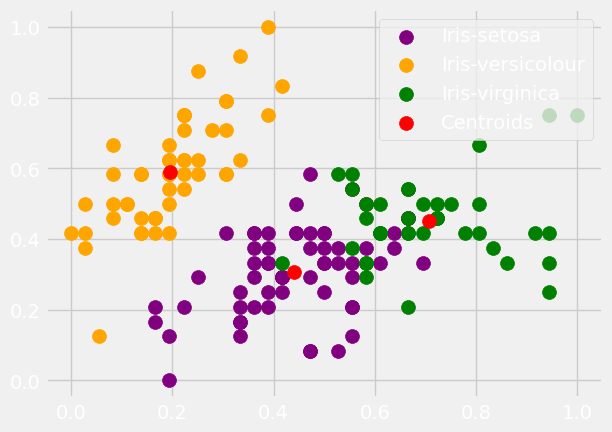

In [19]:
# Visualizando os clusters

plt.scatter(entries[saida_kmeans == 0, 0], entries[saida_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(entries[saida_kmeans == 1, 0], entries[saida_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(entries[saida_kmeans == 2, 0], entries[saida_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotando os centriodes dos clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()